In [564]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [566]:
import warnings
warnings.filterwarnings('ignore')

# Reading Dataset

In [569]:
df = pd.read_csv('Datasets/Loan_Data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [570]:
df.shape

(614, 13)

In [571]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Perform Preprocessing

In [573]:
from sklearn.impute import SimpleImputer

categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

imputer = SimpleImputer(strategy='most_frequent')

df[categorical_cols] = imputer.fit_transform(df[categorical_cols])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [574]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [575]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

columns_to_encode = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])


In [576]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [577]:
numerical_cols = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

imputer = SimpleImputer(strategy='mean')

df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

In [578]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [588]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [590]:
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(float)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)

In [592]:
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)

In [594]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [596]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns: 
    df[col] = label_encoder.fit_transform(df[col].astype(str)) 

In [598]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


## Before Feature Selection

In [601]:
X = df[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']]

In [603]:
y = df['Loan_Status']

In [605]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [607]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [609]:
lr.fit(X_train, y_train)

LogisticRegression()

In [611]:
lr.score(X_test, y_test)

0.7891891891891892

In [613]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [615]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [617]:
rf.score(X_test, y_test)

0.7945945945945946

# Feature Selection

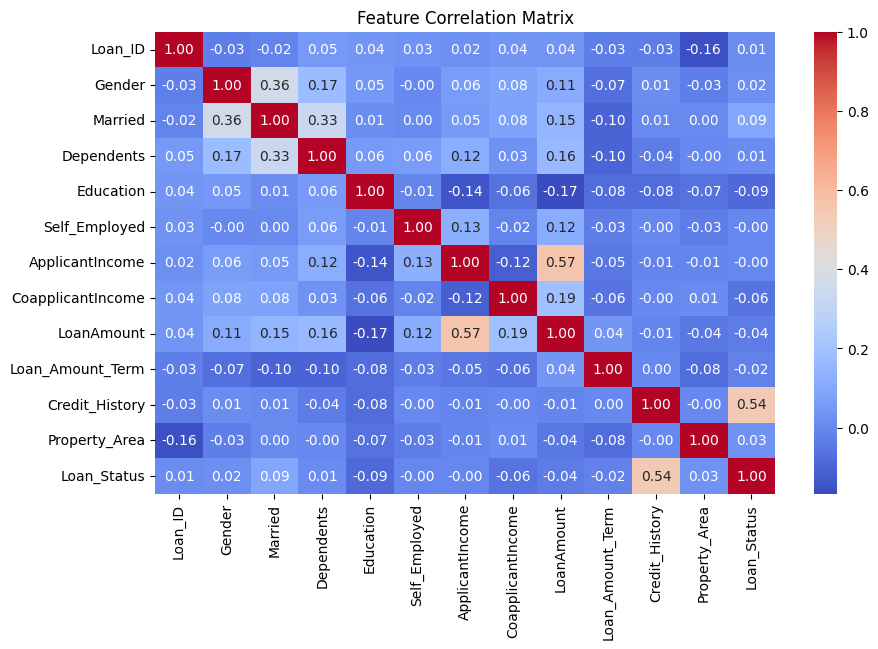

In [620]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [621]:
from sklearn.feature_selection import SelectKBest, chi2

X = df.drop(columns=['Loan_Status'])  
y = df['Loan_Status']

selector = SelectKBest(score_func=chi2, k=8)  
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['Loan_ID', 'Married', 'Education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')


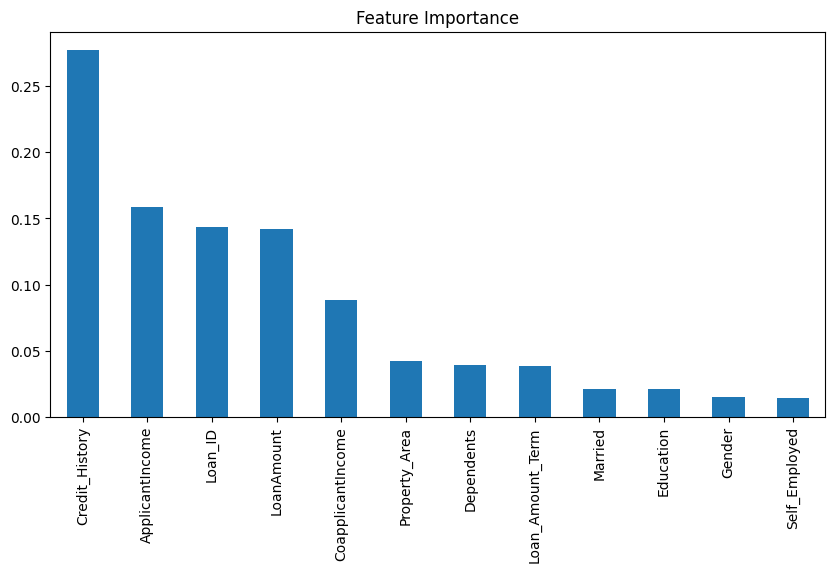

In [622]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)

# Get feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title="Feature Importance")
plt.show()


## After Feature Selection

In [687]:
X = df[['Married', 'Education','Dependents','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History','Property_Area']]
y = df.Loan_Status

In [689]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Logistic Regression

In [692]:
from sklearn.metrics import accuracy_score
log_reg = LogisticRegression()

In [694]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [696]:
y_pred_log = log_reg.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)

print(f"🔹 Logistic Regression Accuracy: {accuracy_log:.2f}")

🔹 Logistic Regression Accuracy: 0.79


## Random Forest

In [699]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [701]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [702]:
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"🌳 Random Forest Accuracy: {accuracy_rf:.2f}")

🌳 Random Forest Accuracy: 0.79


## Xgboost

In [706]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [708]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [709]:
y_pred_xgb = xgb_clf.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

print(f"🚀 XGBoost Accuracy: {accuracy_xgb:.2f}")


🚀 XGBoost Accuracy: 0.75


In [712]:
print("🔍 Model Performance Comparison:")
print(f"🔹 Logistic Regression Accuracy: {accuracy_log:.2f}")
print(f"🌳 Random Forest Accuracy: {accuracy_rf:.2f}")
print(f"🚀 XGBoost Accuracy: {accuracy_xgb:.2f}")


🔍 Model Performance Comparison:
🔹 Logistic Regression Accuracy: 0.79
🌳 Random Forest Accuracy: 0.79
🚀 XGBoost Accuracy: 0.75


In [714]:
from sklearn.metrics import confusion_matrix, classification_report

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()


## Logistic Regression - Classification Report

              precision    recall  f1-score   support

           0       0.93      0.43      0.59        65
           1       0.76      0.98      0.86       120

    accuracy                           0.79       185
   macro avg       0.85      0.71      0.72       185
weighted avg       0.82      0.79      0.76       185



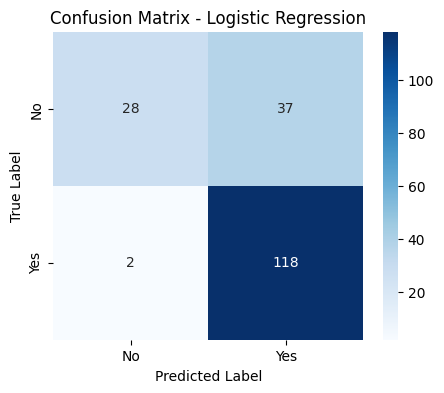

In [717]:
print(classification_report(y_test, y_pred_log))

plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression")


## 🌳 Random Forest - Classification Report

              precision    recall  f1-score   support

           0       0.83      0.52      0.64        65
           1       0.78      0.94      0.86       120

    accuracy                           0.79       185
   macro avg       0.81      0.73      0.75       185
weighted avg       0.80      0.79      0.78       185



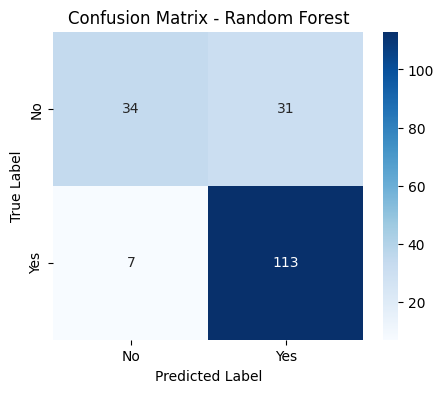

In [720]:
print(classification_report(y_test, y_pred_rf))

plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

## 🚀 XGBoost - Classification Report

              precision    recall  f1-score   support

           0       0.69      0.52      0.60        65
           1       0.77      0.88      0.82       120

    accuracy                           0.75       185
   macro avg       0.73      0.70      0.71       185
weighted avg       0.74      0.75      0.74       185



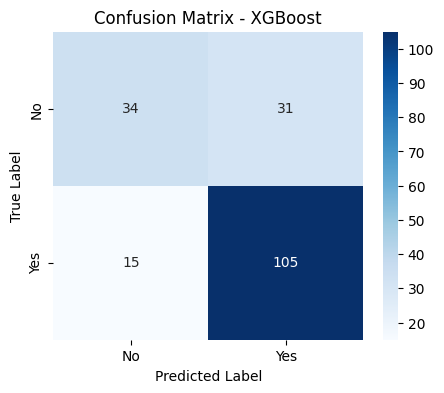

In [723]:
print(classification_report(y_test, y_pred_xgb))
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")

In [725]:
import pickle

with open('Loan_Approval_Prediction.pkl','wb') as f:
    pickle.dump(rf, f)